In [97]:
import os
import pandas as pd

database = 'abalone'


if database == 'CPU_SMALL':
    size_of_dataset = 8192	
elif database == 'abalone':
    size_of_dataset = 4177
elif database == 'Diabetes':
    size_of_dataset = 768
elif database == 'w3a':
    size_of_dataset = 4912
else:
    size_of_dataset = 4912

path = '/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/'
directory = path + f'results/{database}/accuracy_time_stats'  # Replace this with the path to your directory
verbose_path = path + f'results/{database}/verboses'
analysis_files = path + f'analysis/{database}'
plot_path = f'./{database}/plot/'


## columns names 
percent_column = 'percent'
n_components_column = 'n_components' 


# Get a list of all files in the directory
files = [file for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))]

# Now 'files' contains a list of the names of all files in the directory
print(files)

# Separate files with "classification" in their name
ridge_files = [file for file in files if "ridge" in file]
ridge_files.sort()

# Separate other files
svm_files = [file for file in files if file not in ridge_files]
svm_files.sort()
compute_percent = lambda row: row[n_components_column] / size_of_dataset * 100
damping_formula = lambda accuracy, time : accuracy / time *100
damping_column = 'damping'
score_column, time_column = ('Mean Score in test', 'Mean Training Time')

def damping_df(df):
    df[damping_column] = damping_formula(df[score_column],df[time_column])
    return df

 
# Create a DataFrame for ridge files
ridge_data = pd.DataFrame()
ridge_list = []
ridge_list_names = []
ridge_data_verbose = pd.DataFrame()
for file in ridge_files:
    # mean
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    data[percent_column] = data.apply(compute_percent, axis=1)

    data = damping_df(data)
    ridge_list_names.append(file)
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file 
    ridge_data = pd.concat([ridge_data, data], ignore_index=True)
    ridge_list.append(data)

    # verbose
    file_path = os.path.join(verbose_path, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    data[percent_column] = data.apply(compute_percent, axis=1)
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file
    ridge_data_verbose = pd.concat([ridge_data_verbose, data], ignore_index=True) 


svm_data = pd.DataFrame()
svm_data_verbose = pd.DataFrame()
svm_list = []
svm_list_names = []
for file in svm_files:
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    data[percent_column] = data.apply(compute_percent, axis=1)
    data = data.sort_values(by=n_components_column)
    data = damping_df(data)
    data['File'] = file  # Add a column to identify the file
    data = data.sort_values(by=n_components_column)
    svm_data = pd.concat([svm_data, data], ignore_index=True)
    svm_list.append(data)
    svm_list_names.append(file)
    # verbose
    file_path = os.path.join(verbose_path, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    data[percent_column] = data.apply(compute_percent, axis=1)
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file
    svm_data_verbose = pd.concat([svm_data_verbose, data], ignore_index=True)

print('Ridge files')
print(ridge_list_names)
print('SvM files')
print(svm_list_names)
svm_data

['Kernel_ridge_regression_abalone_cv_5.csv', 'Kernel_SVR_abalone_cv_5.csv', 'Nystrom_and_ridge_regression_abalone_cv_5.csv', 'Random_Fourier_features_and_SVR_abalone_cv_5.csv', 'Random_Fourier_features_and_ridge_regression_abalone_cv_5.csv', 'Nystrom_and_SVR_abalone_cv_5.csv']
Ridge files
['Kernel_ridge_regression_abalone_cv_5.csv', 'Nystrom_and_ridge_regression_abalone_cv_5.csv', 'Random_Fourier_features_and_ridge_regression_abalone_cv_5.csv']
SvM files
['Kernel_SVR_abalone_cv_5.csv', 'Nystrom_and_SVR_abalone_cv_5.csv', 'Random_Fourier_features_and_SVR_abalone_cv_5.csv']


,percent,n_components,Mean Score in test,Std Score in test,Mean Training Time,Std Training Time,Mean Best Score in CV,Std Best Score in CV,damping,File
0,100.000000,4177,0.562357,0.019359,0.781310,0.155396,0.563182,0.003719,71.976218,Kernel_SVR_abalone_cv_5.csv
1,0.478813,20,0.536072,0.015503,0.517511,0.138358,0.536171,0.006168,103.586779,Nystrom_and_SVR_abalone_cv_5.csv
2,0.981566,41,0.561163,0.027904,0.853210,0.003815,0.557937,0.010160,65.770874,Nystrom_and_SVR_abalone_cv_5.csv
3,1.987072,83,0.559160,0.012630,1.445915,0.553708,0.562153,0.005998,38.671701,Nystrom_and_SVR_abalone_cv_5.csv
4,3.998085,167,0.559617,0.015547,1.127299,0.134690,0.559576,0.001656,49.642305,Nystrom_and_SVR_abalone_cv_5.csv
...,...,...,...,...,...,...,...,...,...,...
20,13.981326,584,0.562747,0.021160,3.038829,0.241158,0.561828,0.008993,18.518551,Random_Fourier_features_and_SVR_abalone_cv_5.csv
21,15.992339,668,0.561302,0.015134,4.298963,0.545427,0.563555,0.004236,13.056679,Random_Fourier_features_and_SVR_abalone_cv_5.csv
22,17.979411,751,0.556713,0.032029,5.060740,0.307556,0.562344,0.008213,11.000634,Random_Fourier_features_and_SVR_abalone_cv_5.csv
23,19.990424,835,0.563053,0.012106,5.194290,0.246824,0.561189,0.004855,10.839835,Random_Fourier_features_and_SVR_abalone_cv_5.csv


In [98]:
def show_dataframe(dataframe, column, ascending = True, decimals = 3, only_relevant_columns = True, n_rows = None):
      pd.reset_option('display.max_colwidth')
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)

      if only_relevant_columns:
            dataframe = dataframe[["File","percent", column, "n_components" ]]
   
      return dataframe
score_column = ridge_data.columns[2]
time_column = ridge_data.columns[4]
name_column = 'File'

def show_verbose(dataframe, column = n_components_column, ascending = False, decimals = 3, n_rows = None):
      pd.set_option('display.max_colwidth', None)
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)
      return dataframe[["Best Parameters","File","percent", "n_components" ]]


# Sort by score 

In [99]:
show_dataframe(ridge_data, score_column, ascending=False)

,File,percent,Mean Score in test,n_components
7,Nystrom_and_ridge_regression_abalone_cv_5.csv,9.983,0.578,417
0,Kernel_ridge_regression_abalone_cv_5.csv,100.000,0.577,4177
22,Random_Fourier_features_and_ridge_regression_a...,17.979,0.576,751
18,Random_Fourier_features_and_ridge_regression_a...,7.996,0.574,334
9,Nystrom_and_ridge_regression_abalone_cv_5.csv,15.992,0.574,668
5,Nystrom_and_ridge_regression_abalone_cv_5.csv,5.985,0.572,250
2,Nystrom_and_ridge_regression_abalone_cv_5.csv,0.982,0.571,41
11,Nystrom_and_ridge_regression_abalone_cv_5.csv,19.990,0.571,835
20,Random_Fourier_features_and_ridge_regression_a...,13.981,0.571,584
3,Nystrom_and_ridge_regression_abalone_cv_5.csv,1.987,0.570,83


# Damping

In [100]:
show_dataframe(ridge_data, damping_column, ascending=False)

,File,percent,damping,n_components
13,Random_Fourier_features_and_ridge_regression_a...,0.479,3484.577,20
1,Nystrom_and_ridge_regression_abalone_cv_5.csv,0.479,3260.394,20
2,Nystrom_and_ridge_regression_abalone_cv_5.csv,0.982,3172.974,41
14,Random_Fourier_features_and_ridge_regression_a...,0.982,3029.991,41
15,Random_Fourier_features_and_ridge_regression_a...,1.987,2083.854,83
3,Nystrom_and_ridge_regression_abalone_cv_5.csv,1.987,1790.423,83
16,Random_Fourier_features_and_ridge_regression_a...,3.998,1162.153,167
17,Random_Fourier_features_and_ridge_regression_a...,5.985,868.856,250
4,Nystrom_and_ridge_regression_abalone_cv_5.csv,3.998,699.953,167
18,Random_Fourier_features_and_ridge_regression_a...,7.996,689.369,334


# Plotting 
## Ridge

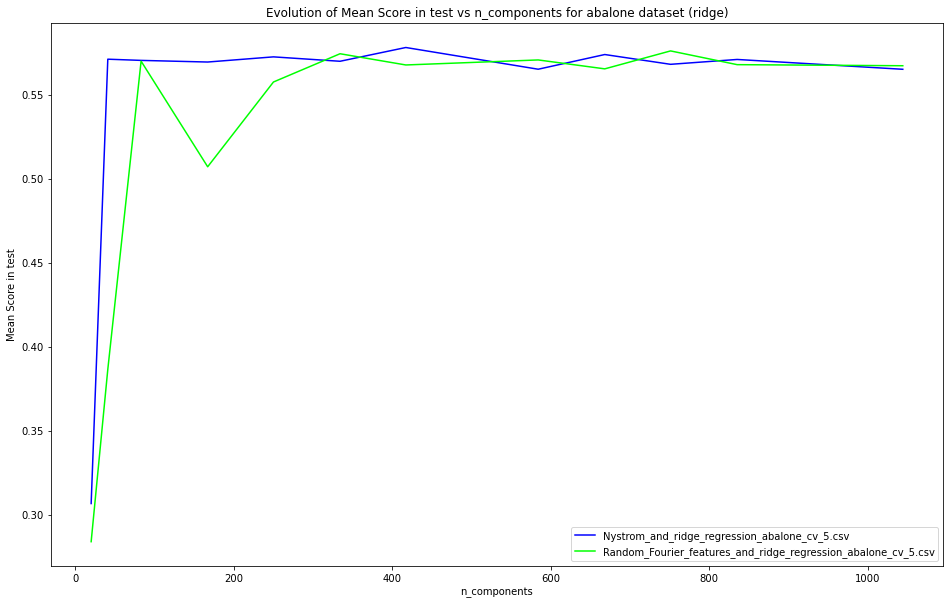

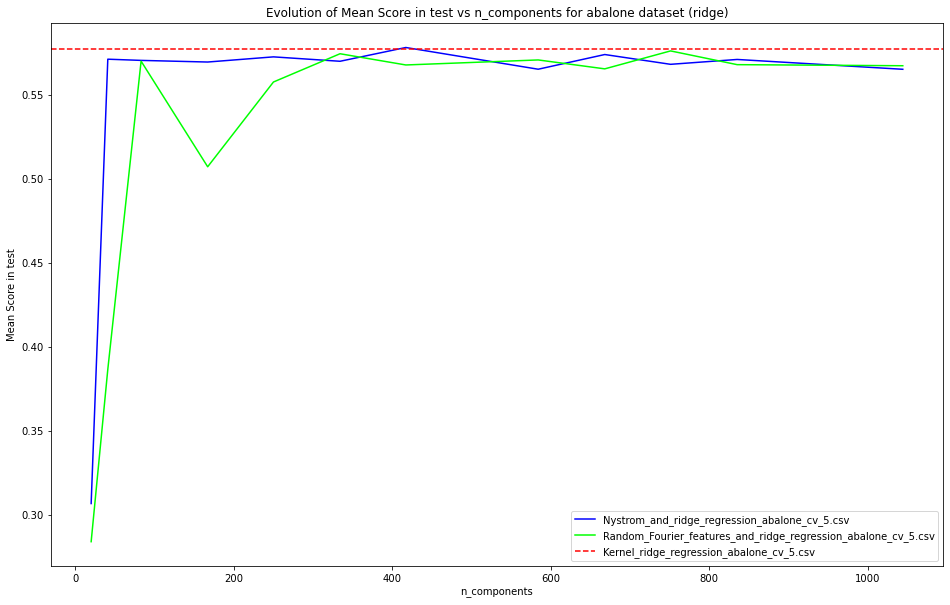

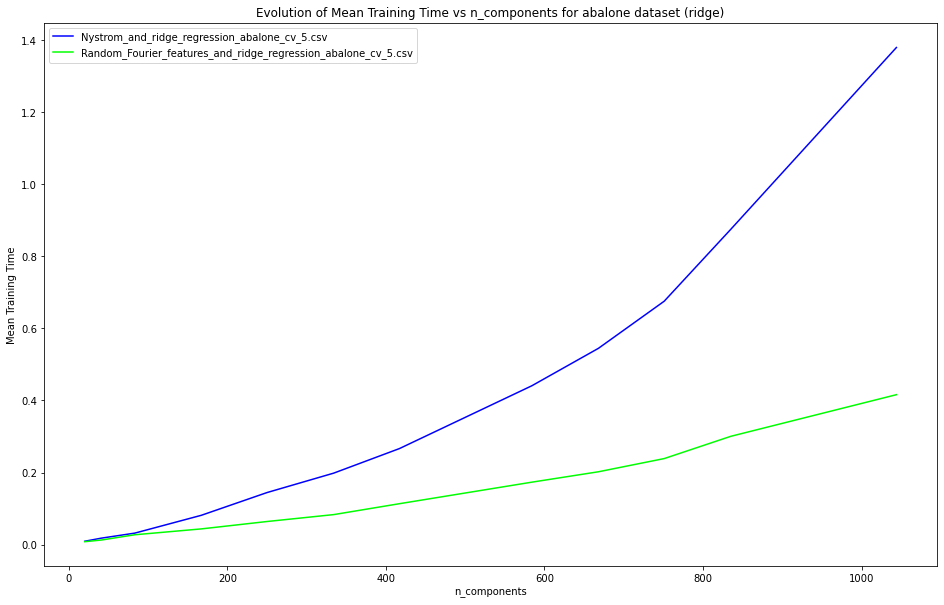

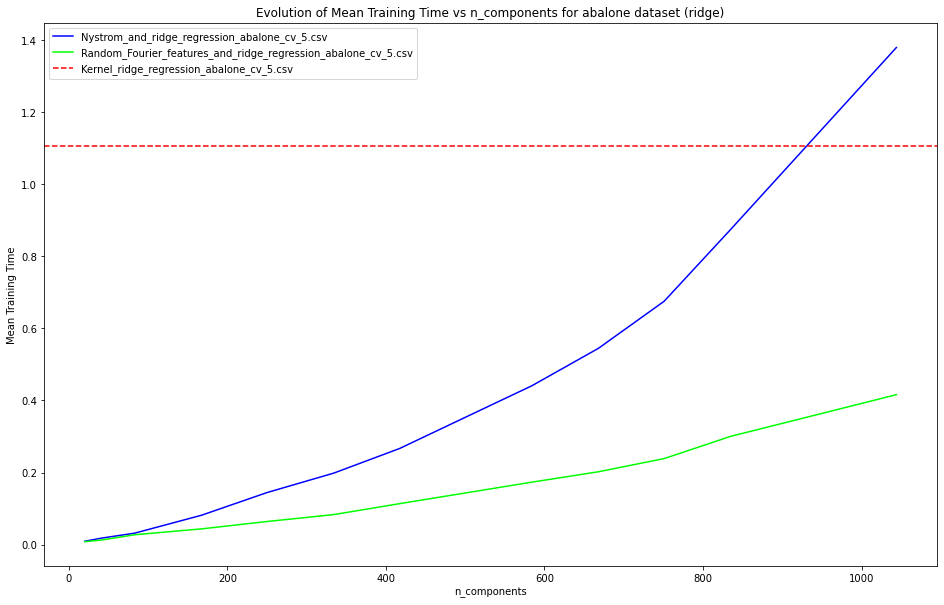

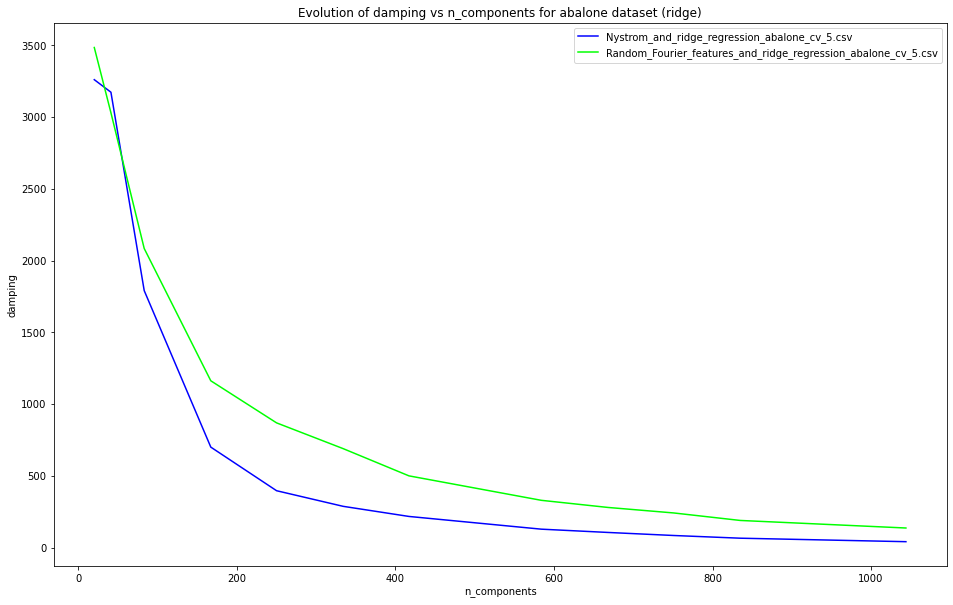

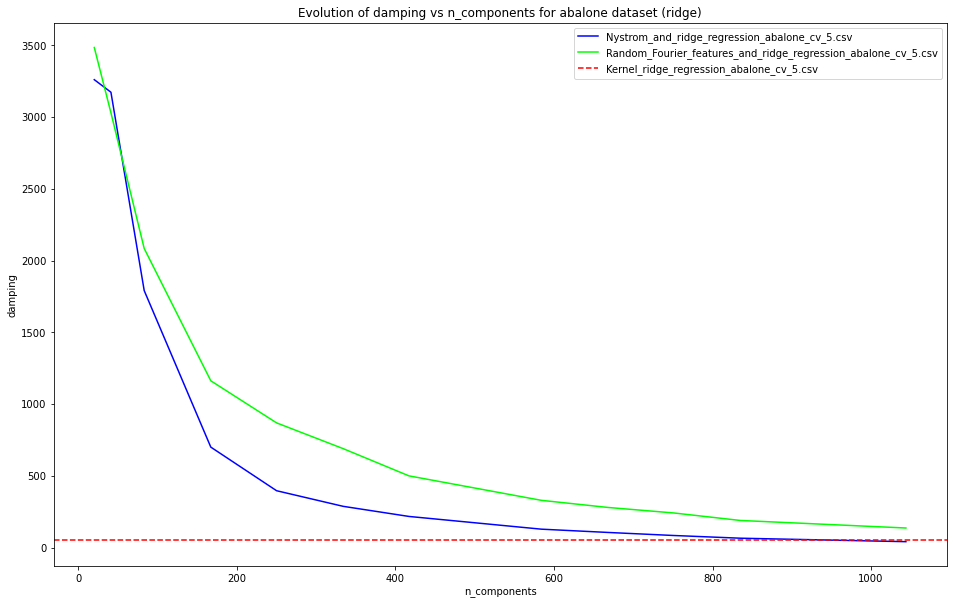

In [101]:
from plotting import view_plots_and_save_them


columns = [score_column, time_column, damping_column ]
  
view_plots_and_save_them(df_list = ridge_list, df_list_names=ridge_list_names, type ='ridge',
                          columns=columns, database=database, plot_path = plot_path)

## SVM 

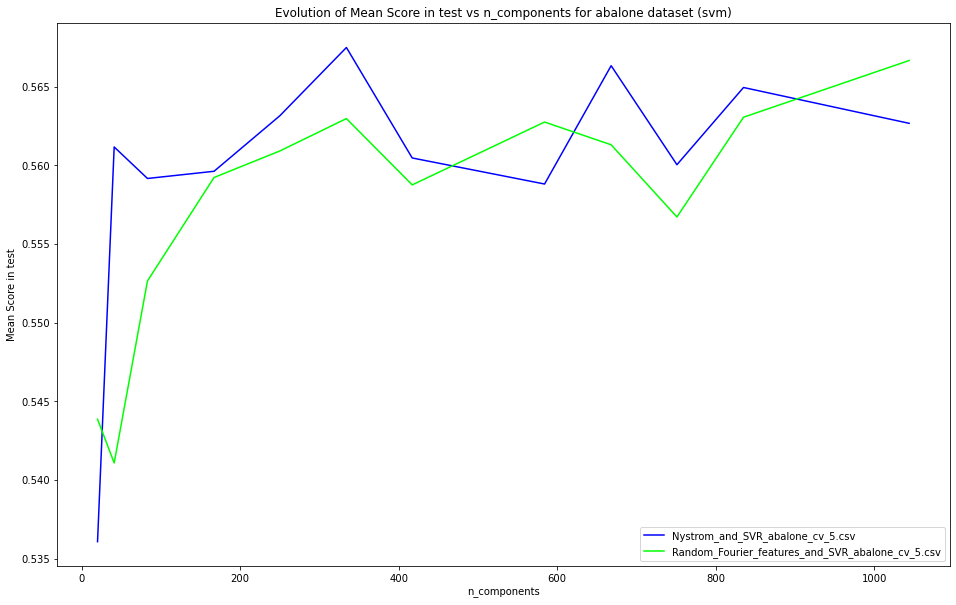

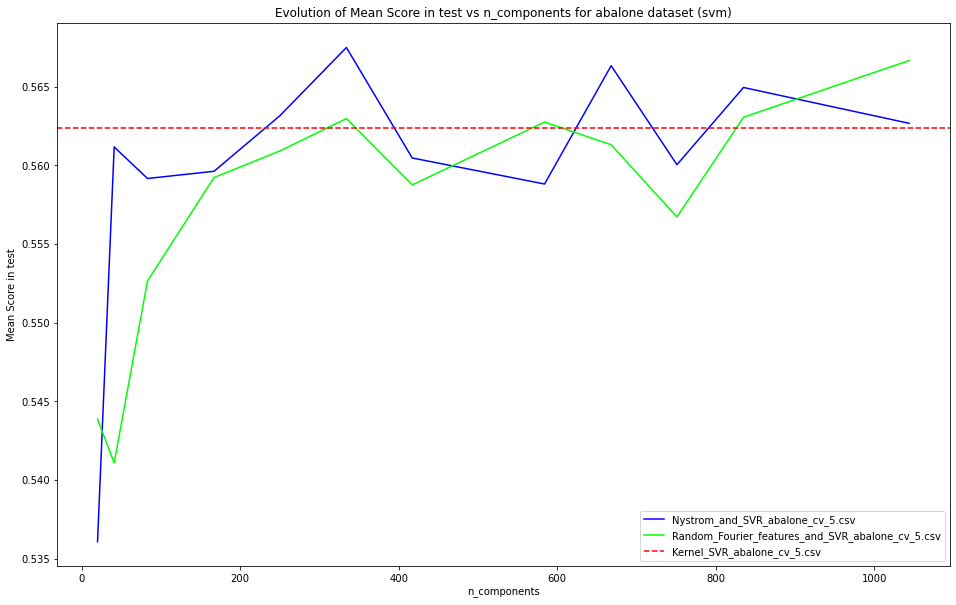

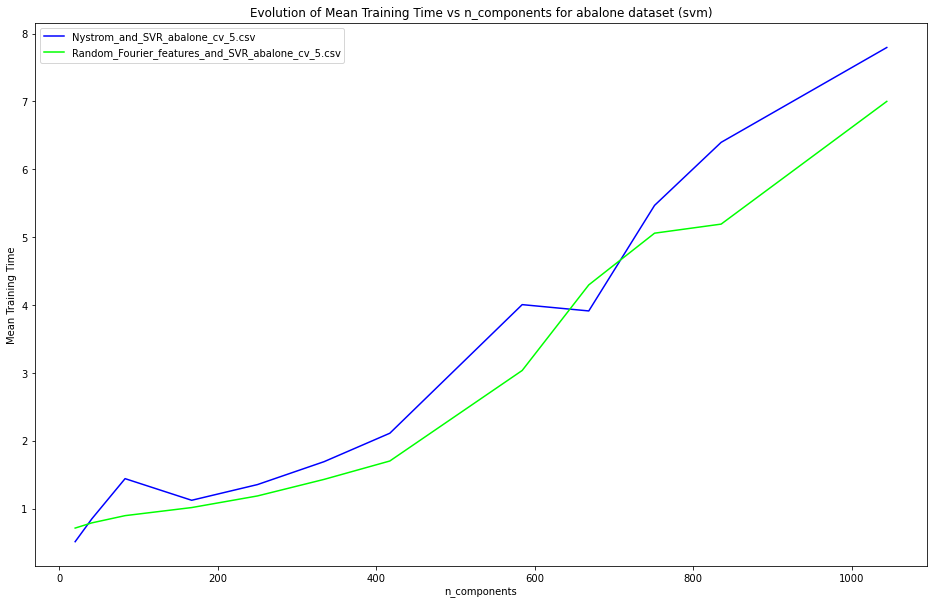

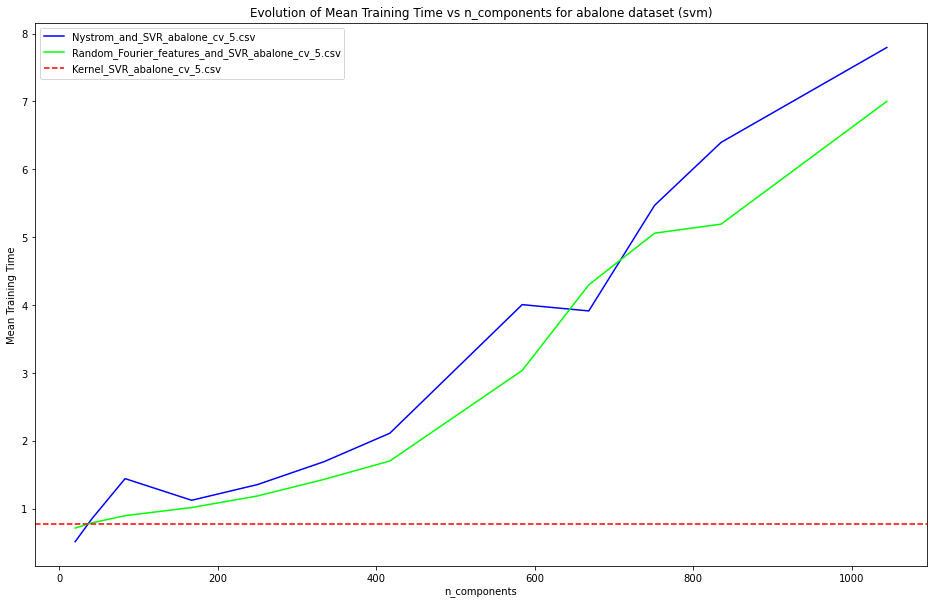

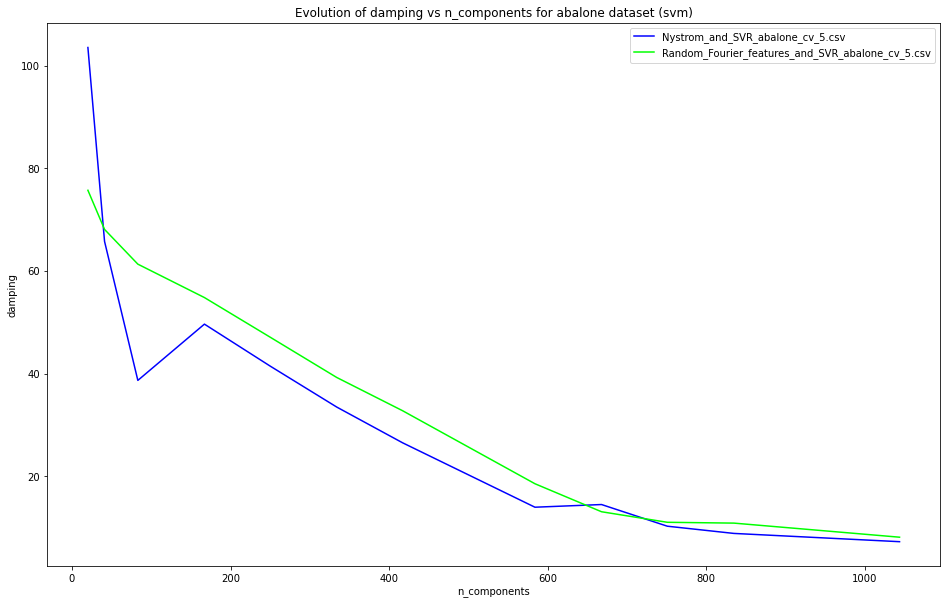

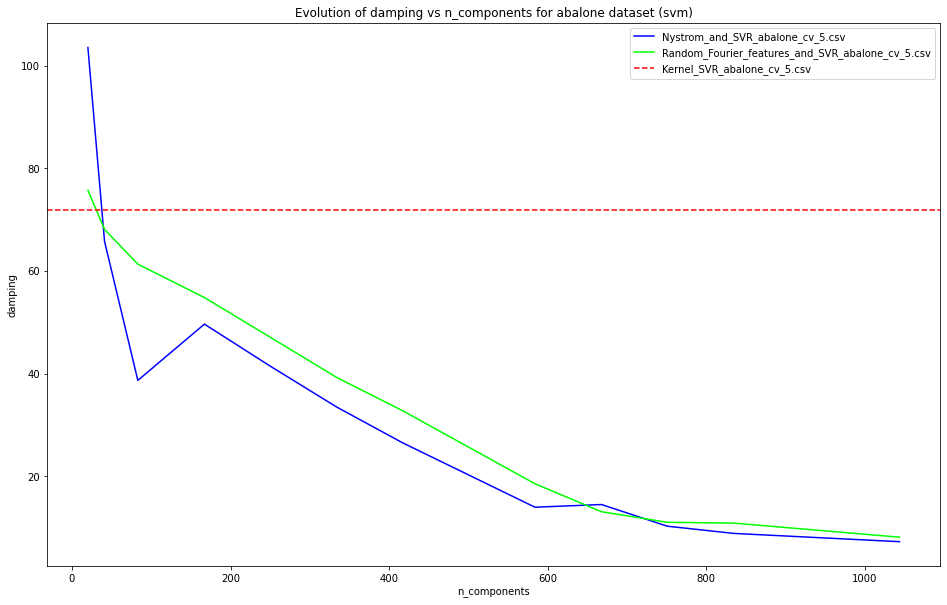

In [102]:
view_plots_and_save_them(df_list = svm_list, df_list_names=svm_list_names, type ='svm',
                          columns=columns, database=database, plot_path = plot_path)

# Hyperparameter

In [103]:
print(show_verbose(svm_data_verbose, n_rows = 20))

                                                                                    Best Parameters  \
0                     {'regressor__kernel_svm__C': 100.0, 'regressor__kernel_svm__gamma': 0.015625}   
2                     {'regressor__kernel_svm__C': 100.0, 'regressor__kernel_svm__gamma': 0.015625}   
3             {'regressor__kernel_svm__C': 1.0, 'regressor__kernel_svm__gamma': 0.1767766952966369}   
1                     {'regressor__kernel_svm__C': 100.0, 'regressor__kernel_svm__gamma': 0.015625}   
48      {'regressor__nystroem__gamma': 0.1767766952966369, 'regressor__svm__C': 3.1622776601683795}   
..                                                                                              ...   
7                 {'regressor__nystroem__gamma': 0.015625, 'regressor__svm__C': 3.1622776601683795}   
6                 {'regressor__nystroem__gamma': 0.015625, 'regressor__svm__C': 3.1622776601683795}   
5                 {'regressor__nystroem__gamma': 0.0013810679320049757, '